<a href="https://colab.research.google.com/github/lazy-wolf/TME_6015/blob/main/A2_Kaggle_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 2**

```
# Authoured by: Wasim Dawood Shaik
# UNB ID: 3744476
# Date: 23-10-2023
```

**Delivarable_1 : Create your own separate python notebooks in Colab for each of the three sources.**

**Creating separate python notebooks in Colab for using pre-trained models and dataset from Kaggle**

**Import Libraries**

In [1]:
from google.colab import drive
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,classification_report

In [2]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**Dataset Info**

[mango leaf disease dataset link](https://huggingface.co/datasets/beans)

*https://www.kaggle.com/datasets/aryashah2k/mango-leaf-disease-dataset/data*

**Importing Dataset from Kaggle Datasets from Google Drive**

**Data Preprocessing and Data Analysis**

In [3]:
directory = "/content/drive/MyDrive/TME_6015/Assignment_2/Mango_Leaf_Disease"
batch_size = 32
img_height = 128
img_width = 128
train_data = tf.keras.utils.image_dataset_from_directory(directory,
                                                         validation_split=0.2,
                                                         seed=123,
                                                         subset="training",
                                                         image_size=(img_height, img_width),
                                                         batch_size=batch_size)

Found 4000 files belonging to 8 classes.
Using 3200 files for training.


In [4]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [5]:
class_names =train_data.class_names
print(class_names)

['Anthracnose', 'Bacterial Canker', 'Cutting Weevil', 'Die Back', 'Gall Midge', 'Healthy', 'Powdery Mildew', 'Sooty Mould']


In [6]:
val_data = tf.keras.utils.image_dataset_from_directory(directory,
                                                       validation_split=0.2,
                                                       subset="validation",
                                                       seed=123,
                                                       image_size=(img_height, img_width),
                                                       batch_size=batch_size)

Found 4000 files belonging to 8 classes.
Using 800 files for validation.


In [7]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

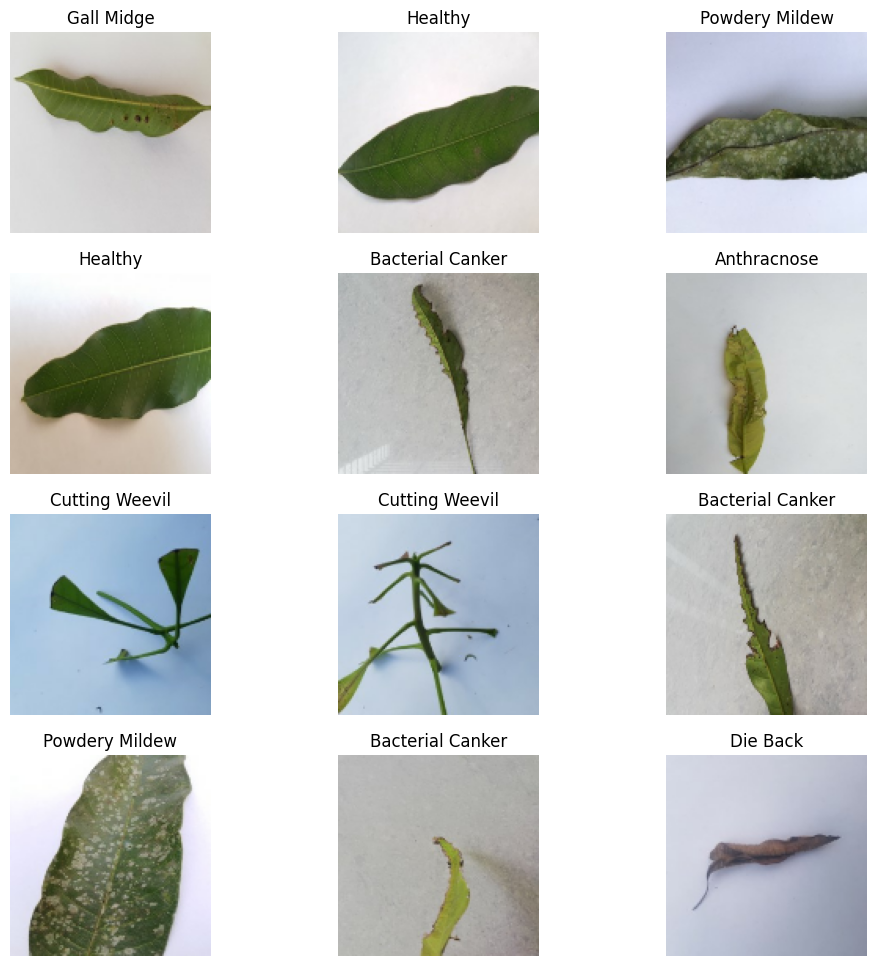

In [8]:
plt.figure(figsize=(12, 12))
for images, labels in train_data.take(1):
    for i in range(12):
        ax = plt.subplot(4, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

**Create a Model**

[mobilenet-v2 link](https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/035-128-classification/versions/2)

*https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/035-128-classification/versions/2*

In [9]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [10]:
model_handle = "https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/035-128-classification/versions/2"

feature_extractor = hub.KerasLayer(model_handle,
                                   trainable=True)
num_class = 8
model = tf.keras.Sequential(
    [
        normalization_layer,
        feature_extractor,
        tf.keras.layers.Dense(num_class, activation="softmax")
    ]
)
model.build([None, 128, 128, 3])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 keras_layer (KerasLayer)    (None, 1001)              1692489   
                                                                 
 dense (Dense)               (None, 8)                 8016      
                                                                 
Total params: 1700505 (6.49 MB)
Trainable params: 1686425 (6.43 MB)
Non-trainable params: 14080 (55.00 KB)
_________________________________________________________________


**Compile and Train the Model**

In [12]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"]
             )

In [13]:
learning_rate_reduction=tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",patience=2,factor=0.5, min_lr=0.00001,verbose =1)
Early_Stopping= tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=5, restore_best_weights=True)

In [14]:
history_1= model.fit(train_data, epochs=20, validation_data= val_data,callbacks=[Early_Stopping,learning_rate_reduction], verbose=1)

Epoch 1/20
100/100 [==============================] - 491s 5s/step - loss: 0.7197 - accuracy: 0.8778 - val_loss: 7.5531 - val_accuracy: 0.5775 - lr: 0.0010
Epoch 2/20
100/100 [==============================] - 110s 1s/step - loss: 0.4127 - accuracy: 0.9444 - val_loss: 0.8899 - val_accuracy: 0.9075 - lr: 0.0010
Epoch 3/20
100/100 [==============================] - 105s 1s/step - loss: 0.2028 - accuracy: 0.9753 - val_loss: 0.4287 - val_accuracy: 0.9400 - lr: 0.0010
Epoch 4/20
100/100 [==============================] - 104s 1s/step - loss: 0.2193 - accuracy: 0.9691 - val_loss: 0.9427 - val_accuracy: 0.8775 - lr: 0.0010
Epoch 5/20
100/100 [==============================] - 106s 1s/step - loss: 0.1974 - accuracy: 0.9725 - val_loss: 0.2296 - val_accuracy: 0.9675 - lr: 0.0010
Epoch 6/20
100/100 [==============================] - 111s 1s/step - loss: 0.1693 - accuracy: 0.9806 - val_loss: 0.2067 - val_accuracy: 0.9762 - lr: 0.0010
Epoch 7/20
100/100 [==============================] - 108s 1s/st

**Evaluate the Model**

In [15]:
loss, accuracy= model.evaluate(val_data)
print(f"loss is: {loss}")
print(f"accuacy is: {accuracy}")

25/25 [==============================] - 5s 165ms/step - loss: 0.0915 - accuracy: 0.9975
loss is: 0.09154576063156128
accuacy is: 0.9975000023841858


In [16]:
history_mobilenet_v2= pd.DataFrame(history_1.history)
history_mobilenet_v2.head()

,loss,accuracy,val_loss,val_accuracy,lr
0,0.719714,0.877813,7.553110,0.5775,0.001
1,0.412697,0.944375,0.889881,0.9075,0.001
2,0.202801,0.975312,0.428659,0.9400,0.001
3,0.219279,0.969063,0.942667,0.8775,0.001
4,0.197429,0.972500,0.229585,0.9675,0.001


**Plot Training History**

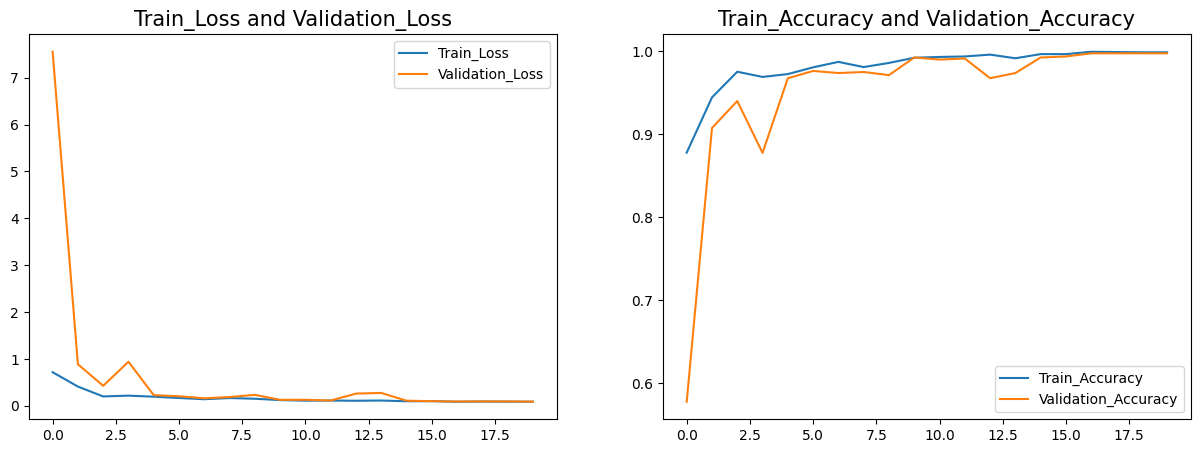

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history_mobilenet_v2['loss'],label='Train_Loss')
plt.plot(history_mobilenet_v2['val_loss'],label='Validation_Loss')
plt.title('Train_Loss and Validation_Loss',fontsize=15)
plt.legend()


plt.subplot(1,2,2)
plt.plot(history_mobilenet_v2['accuracy'],label='Train_Accuracy')
plt.plot(history_mobilenet_v2['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy and Validation_Accuracy',fontsize=15)
plt.legend()
plt.show()

**Model Accuracy**

In [18]:
x_test=[]
y_test=[]
y_pred=[]

for images, labels in val_data:
    x_test.extend(images.numpy())
    y_test.extend(labels.numpy())


predictions=model.predict(np.array(x_test))
for i in predictions:
    y_pred.append(np.argmax(i))

25/25 [==============================] - 3s 115ms/step


**Accuracy Score of Model on Test Dataset**

In [19]:
accuracy_score(y_test, y_pred)*100

99.75

**Delivarable_2 : Show a few examples of the predicted output**

**Showing Examples of Predicted Output**

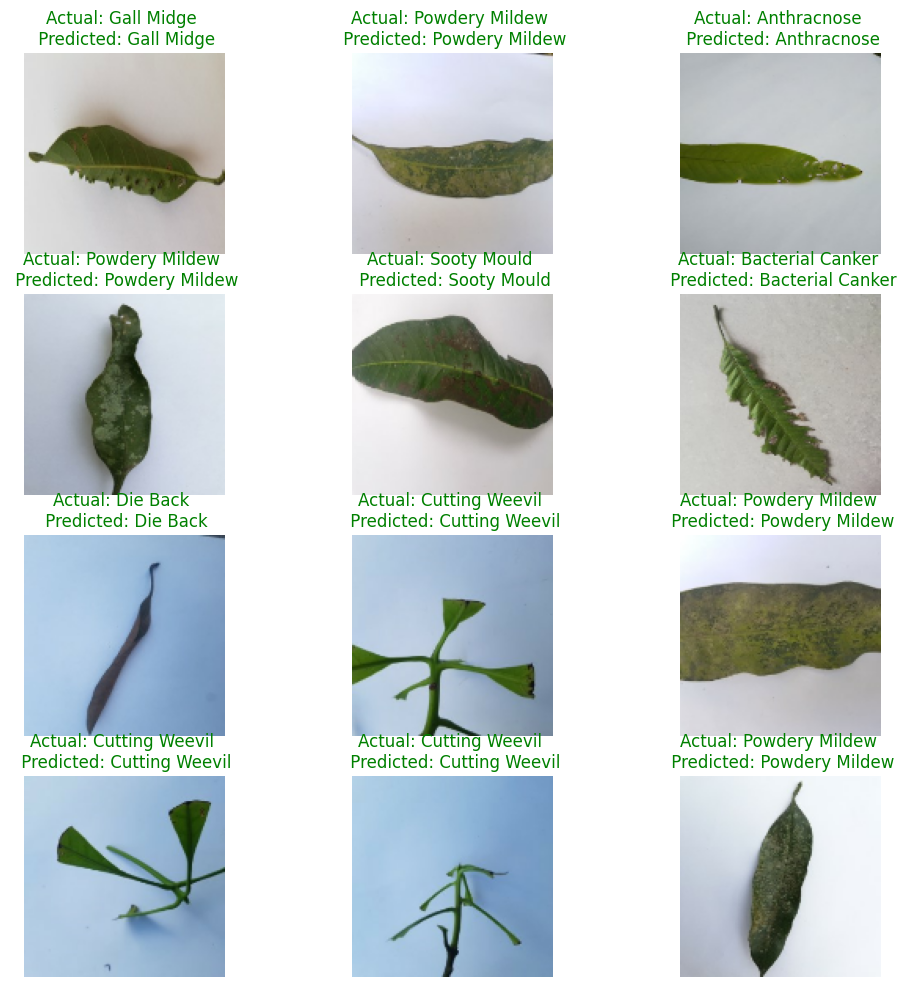

In [20]:
plt.figure(figsize=(12, 12))

for i in range(12):
    ax = plt.subplot(4, 3, i + 1)
    plt.imshow(x_test[i].astype("uint8"))
    actual_label = class_names[y_test[i]]
    predicted_label = class_names[y_pred[i]]

    # Check if the actual and predicted labels are the same
    if actual_label == predicted_label:
        label_color = 'green'
    else:
        label_color = 'red'

    plt.title(f'Actual: {actual_label} \n Predicted: {predicted_label}', color=label_color)
    plt.axis("off")

plt.show()

**F-1, Precision, Recall Scores - Macro**

In [21]:

f1_score_value = f1_score(y_pred, y_test, average="macro")
precision_score_value = precision_score(y_pred, y_test, average="macro")
recall_score_value = recall_score(y_pred, y_test, average="macro")

# Print the Results
print(f"F1-Score:{f1_score_value}")
print(f"Precision:{precision_score_value}")
print(f"Recall:{recall_score_value}")

F1-Score:0.9973684210526316
Precision:0.9973958333333333
Recall:0.9973958333333333


In [22]:
y_test_labels=list(map(lambda e: class_names[e], y_test))

In [23]:
y_test_labels[:5]

['Gall Midge',
 'Powdery Mildew',
 'Anthracnose',
 'Powdery Mildew',
 'Sooty Mould']

In [24]:
y_pred_labels=list(map(lambda e: class_names[e], y_pred))

In [25]:
y_pred_labels[:5]

['Gall Midge',
 'Powdery Mildew',
 'Anthracnose',
 'Powdery Mildew',
 'Sooty Mould']

**Classification Report**


In [26]:
print("Classification_Report")
print("-----------------------")
print(classification_report(y_test_labels,y_pred_labels))

Classification_Report
-----------------------
                  precision    recall  f1-score   support

     Anthracnose       1.00      1.00      1.00       104
Bacterial Canker       1.00      1.00      1.00        94
  Cutting Weevil       1.00      1.00      1.00        95
        Die Back       1.00      1.00      1.00        97
      Gall Midge       0.98      1.00      0.99        94
         Healthy       1.00      1.00      1.00       111
  Powdery Mildew       1.00      1.00      1.00       109
     Sooty Mould       1.00      0.98      0.99        96

        accuracy                           1.00       800
       macro avg       1.00      1.00      1.00       800
    weighted avg       1.00      1.00      1.00       800



**Delivarable_3 : Display the results of the prediction results using a confusion matrix**

**Displaying Prediction Results using Confusion Matrix**

Confusion_Matrix
----------------------


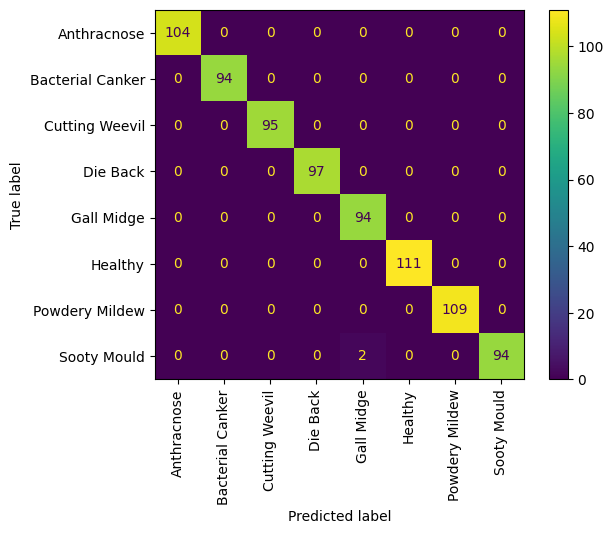

In [27]:
print("Confusion_Matrix")
print("----------------------")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=class_names, xticks_rotation="vertical")
plt.show()